# Binary classification

## Imports & dataset loading

In [1]:
import pandas as pd

In [2]:
import numpy as np


In [3]:
import matplotlib
import matplotlib.pyplot as plt


In [4]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [6]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score

In [7]:
import joblib

In [12]:
# load the training dataset
dataset = pd.read_csv('Admission_Predict_Ver1.1.csv')
dataset.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


## Data preparation

In [19]:
dataset = dataset.drop(columns='Serial No.')

In [20]:
dataset['Chance of Admit ']=dataset['Chance of Admit '].map(lambda x: 0 if x<0.75 else 1)

In [21]:
dataset.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,1
1,324,107,4,4.0,4.5,8.87,1,1
2,316,104,3,3.0,3.5,8.00,1,0
3,322,110,3,3.5,2.5,8.67,1,1
4,314,103,2,2.0,3.0,8.21,0,0


## Data split

In [22]:
# Separate features and labels
features = ['GRE Score','TOEFL Score','University Rating','SOP','LOR ','CGPA','Research']
label = 'Chance of Admit '
X, y = dataset[features].values, dataset[label].values

for n in range(0,4):
    print("Row", str(n+1), "\n  Features:",list(X[n]), "\n  Label:", y[n])

Row 1 
  Features: [337.0, 118.0, 4.0, 4.5, 4.5, 9.65, 1.0] 
  Label: 1
Row 2 
  Features: [324.0, 107.0, 4.0, 4.0, 4.5, 8.87, 1.0] 
  Label: 1
Row 3 
  Features: [316.0, 104.0, 3.0, 3.0, 3.5, 8.0, 1.0] 
  Label: 0
Row 4 
  Features: [322.0, 110.0, 3.0, 3.5, 2.5, 8.67, 1.0] 
  Label: 1


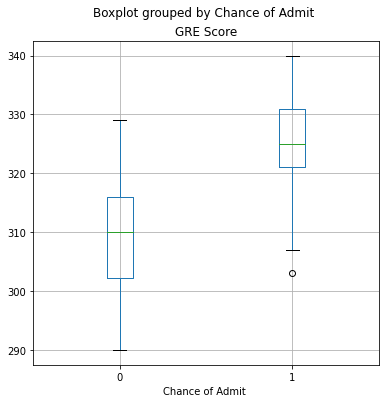

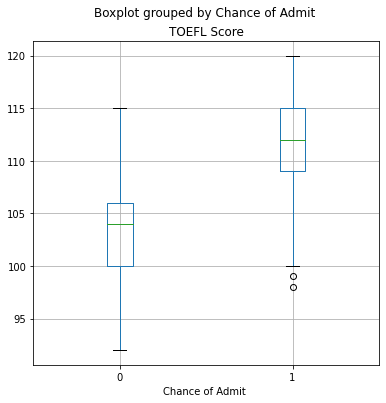

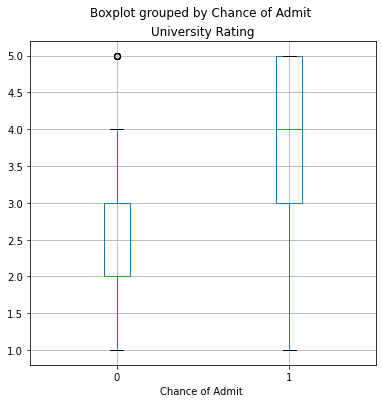

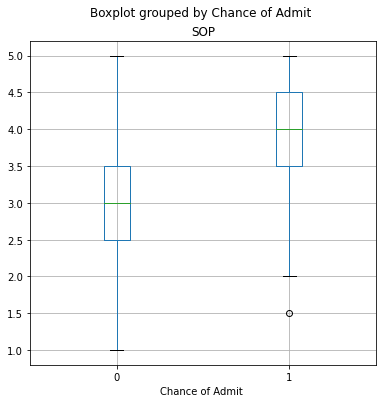

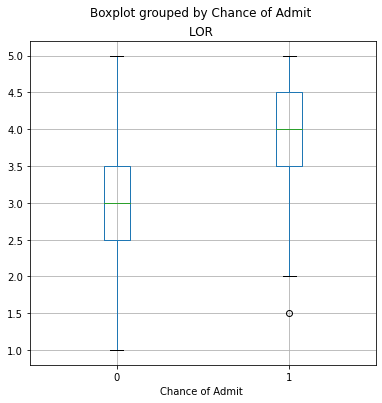

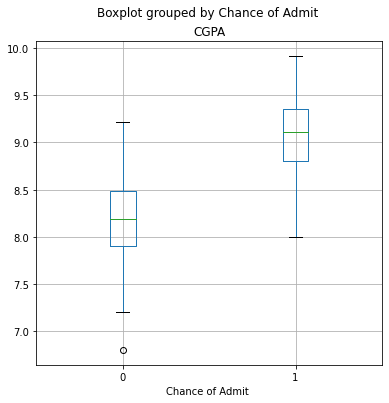

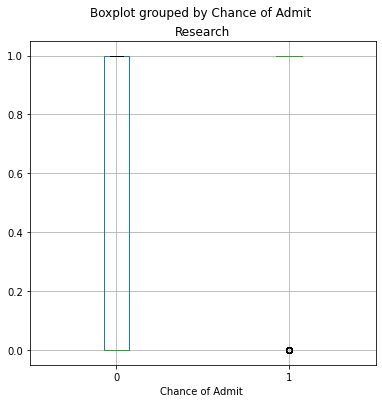

In [23]:
features = ['GRE Score','TOEFL Score','University Rating','SOP','LOR ','CGPA','Research']
for col in features:
    dataset.boxplot(column=col, by='Chance of Admit ', figsize=(6,6))
    plt.title(col)
plt.show()

In [24]:
# Split data 70%-30% into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

print ('Training cases: %d\nTest cases: %d' % (X_train.shape[0], X_test.shape[0]))

Training cases: 350
Test cases: 150


## Data preprocessing & training

<span style="color:red">**!!! Insert here data preparation as necessary !!!**</span>

In [26]:
print(dataset.dtypes)

GRE Score              int64
TOEFL Score            int64
University Rating      int64
SOP                  float64
LOR                  float64
CGPA                 float64
Research               int64
Chance of Admit        int64
dtype: object


In [27]:
# Define preprocessing for numeric columns (normalize them so they're on the same scale)
numeric_features = [0,1,2,3,4,5,6]
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])

# Define preprocessing for categorical features (encode the Age column)
categorical_features = []
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])



## Train Logistic Regression

In [37]:
# Set regularization rate
reg = 0.01

# Create preprocessing and training pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('logregressor', LogisticRegression(C=1/reg, solver="liblinear"))])


# fit the pipeline to train a logistic regression model on the training set
model = pipeline.fit(X_train, (y_train))
print (model)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  [0, 1, 2, 3, 4, 5, 6]),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  [7])])),
                ('logregressor',
                 LogisticRegression(C=100.0, solver='liblinear'))])


## Train RandomForest Classification

In [28]:
# Create preprocessing and training pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('logregressor', RandomForestClassifier(n_estimators=100))])

# fit the pipeline to train a random forest model on the training set
model = pipeline.fit(X_train, (y_train))
print (model)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  [0, 1, 2, 3, 4, 5, 6]),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  [])])),
                ('logregressor', RandomForestClassifier())])


## Evaluate

In [29]:
predictions = model.predict(X_test)
print('Predicted labels: ', predictions)
print('Actual labels:    ' ,y_test)

Predicted labels:  [0 1 1 1 0 0 0 0 0 1 0 0 0 1 1 0 1 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 1
 1 0 0 0 1 1 0 1 1 1 1 0 0 0 0 0 1 0 1 0 1 0 0 0 1 0 1 0 0 0 1 0 1 1 1 0 0
 1 1 1 0 0 0 0 1 0 0 1 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0
 0 0 0 0 1 0 1 1 1 0 0 1 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 1 1 1 0 0 0
 1 1]
Actual labels:     [0 1 1 1 0 0 0 0 0 1 0 0 0 1 1 0 1 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 1
 1 0 0 0 1 1 1 0 1 1 1 0 0 0 0 0 1 0 1 0 1 0 0 0 1 0 1 0 0 0 1 0 0 1 0 1 0
 1 1 1 0 0 0 0 1 0 0 1 0 1 0 0 0 1 1 0 0 0 1 0 0 0 0 1 0 1 0 1 0 0 1 0 1 0
 0 0 0 0 1 0 1 1 1 0 1 1 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 1 1 0 1 1 0 1 0
 1 1]


In [30]:
print('Accuracy: ', accuracy_score(y_test, predictions))

Accuracy:  0.9


In [31]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.90      0.95      0.92        92
           1       0.91      0.83      0.86        58

    accuracy                           0.90       150
   macro avg       0.90      0.89      0.89       150
weighted avg       0.90      0.90      0.90       150



In [32]:
print("Overall Precision:",precision_score(y_test, predictions))
print("Overall Recall:",recall_score(y_test, predictions))

Overall Precision: 0.9056603773584906
Overall Recall: 0.8275862068965517


In [33]:
# Print the confusion matrix
cm = confusion_matrix(y_test, predictions)
print (cm)

[[87  5]
 [10 48]]


In [34]:
y_scores = model.predict_proba(X_test)
print(y_scores)

[[0.84 0.16]
 [0.01 0.99]
 [0.23 0.77]
 [0.   1.  ]
 [1.   0.  ]
 [0.97 0.03]
 [1.   0.  ]
 [0.62 0.38]
 [1.   0.  ]
 [0.39 0.61]
 [0.93 0.07]
 [0.54 0.46]
 [0.99 0.01]
 [0.33 0.67]
 [0.   1.  ]
 [1.   0.  ]
 [0.   1.  ]
 [0.94 0.06]
 [0.45 0.55]
 [0.99 0.01]
 [1.   0.  ]
 [0.58 0.42]
 [1.   0.  ]
 [0.   1.  ]
 [0.   1.  ]
 [0.83 0.17]
 [0.53 0.47]
 [0.98 0.02]
 [1.   0.  ]
 [1.   0.  ]
 [0.65 0.35]
 [1.   0.  ]
 [0.93 0.07]
 [0.   1.  ]
 [0.98 0.02]
 [0.77 0.23]
 [0.03 0.97]
 [0.   1.  ]
 [1.   0.  ]
 [0.99 0.01]
 [0.99 0.01]
 [0.   1.  ]
 [0.   1.  ]
 [0.86 0.14]
 [0.38 0.62]
 [0.05 0.95]
 [0.   1.  ]
 [0.08 0.92]
 [0.93 0.07]
 [0.92 0.08]
 [1.   0.  ]
 [1.   0.  ]
 [1.   0.  ]
 [0.26 0.74]
 [0.81 0.19]
 [0.   1.  ]
 [1.   0.  ]
 [0.   1.  ]
 [0.99 0.01]
 [0.92 0.08]
 [0.99 0.01]
 [0.   1.  ]
 [0.99 0.01]
 [0.   1.  ]
 [0.5  0.5 ]
 [0.98 0.02]
 [0.69 0.31]
 [0.   1.  ]
 [1.   0.  ]
 [0.41 0.59]
 [0.01 0.99]
 [0.31 0.69]
 [0.86 0.14]
 [0.85 0.15]
 [0.14 0.86]
 [0.   1.  ]
 [0.44 0.56]

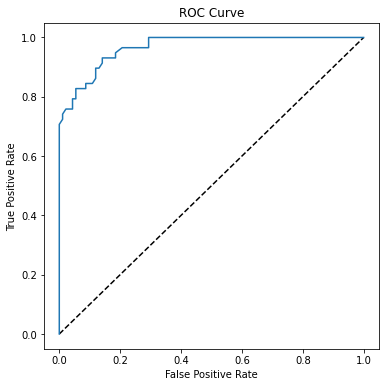

In [35]:
# calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_scores[:,1])

# plot ROC curve
fig = plt.figure(figsize=(6, 6))
# Plot the diagonal 50% line
plt.plot([0, 1], [0, 1], 'k--')
# Plot the FPR and TPR achieved by our model
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [36]:
auc = roc_auc_score(y_test,y_scores[:,1])
print('AUC: ' + str(auc))

AUC: 0.9670164917541229


## Save model

In [37]:
# Save the model as a pickle file
filename = './model.pkl'
joblib.dump(model, filename)

['./model.pkl']